In [1]:
import os
import json
import pandas as pd
import matplotlib.pyplot as plt

userlog_path = "UserLog"
data = []
# pd = {}
vd = {}
auto_note = []
manual_note = []

# for user_folder in os.listdir(userlog_path):
for folder_number in range(1, 13):
    user_folder = f'P{folder_number}'
    print(f'Processing {user_folder}')
    user_data = {}
    user_folder_path = os.path.join(userlog_path, user_folder)
    if os.path.isdir(user_folder_path):
        folder_number = int(user_folder[1:])
        # if folder_number % 2 == 0:
        for subdir, _, files in os.walk(user_folder_path):
            for file in files:

                str_rep = ''
                
                file_path = os.path.join(subdir, file)
                if file == 'onboarding.json':
                    pass
                # if not file.lower().startswith('video1') and not file.lower().startswith('video2'): continue
                elif file.lower().startswith('video1') or file.lower().startswith('video2'):
                    video_data = {}
                    vd_data = {}
                    with open(file_path, 'r', encoding='utf-8') as f:
                        bullet_points_data = json.load(f)
                    video_data['pauseCount'] = bullet_points_data['pauseCount']
                    video_data['forwardCount'] = bullet_points_data['forwardCount']
                    video_data['reverseCount'] = bullet_points_data['reverseCount']
                    video_data['point_count'] = len(bullet_points_data['editHistory'])
                    video_data['expandCount'] = bullet_points_data['buttonStats']['expand_count']
                    video_data['themeCount'] = bullet_points_data['buttonStats']['theme_count']
                    summary_t = bullet_points_data['summary_t']
                    summary_p = bullet_points_data['summary_p']
                    note_points = [
                        {
                            'point': bpd['point'], 
                            'time_taken': bpd['note_taking_time'],
                            'timestamp': bpd['utc_time'],
                            'expanded_note': bpd['edit'][-1][0]['e_point'] if len(bpd['edit']) > 1 else None,
                            'transcript': bpd['fraction_transcript'],
                            'v_id': file.lower()
                        }
                        for bpd in bullet_points_data['editHistory']
                    ]

                    note_points = note_points[1:-1] # discarding first and last noisy point

                    for bpd in bullet_points_data['editHistory']:
                        str_rep += bpd['edit'][-1][0]['e_point']

                    vd_data['p_id'] = user_folder
                    vd_data['note_points'] = note_points
                    vd_data['summary_p'] = summary_p
                    vd_data['summary_t'] = summary_t
                    if folder_number % 2 == 0:
                        if file.lower().startswith('video1'): 
                            user_data['Baseline'] = video_data
                            vd_data['micronote'] = False
                            if 'video1' not in vd:
                                vd['video1'] = []
                            vd['video1'].append(vd_data)
                            manual_note.append(str_rep)
                        elif file.lower().startswith('video2'): 
                            user_data['NoTeeline'] = video_data
                            vd_data['micronote'] = True
                            if 'video2' not in vd:
                                vd['video2'] = []
                            vd['video2'].append(vd_data)
                            auto_note.append(str_rep)
                    else:
                        if file.lower().startswith('video1'): 
                            user_data['NoTeeline'] = video_data
                            vd_data['micronote'] = True
                            if 'video1' not in vd:
                                vd['video1'] = []
                            vd['video1'].append(vd_data)
                            auto_note.append(str_rep)
                        elif file.lower().startswith('video2'): 
                            user_data['Baseline'] = video_data
                            vd_data['micronote'] = False
                            if 'video2' not in vd:
                                vd['video2'] = []
                            vd['video2'].append(vd_data)
                            manual_note.append(str_rep)
    data.append(user_data)

Processing P1
Processing P2
Processing P3
Processing P4
Processing P5
Processing P6
Processing P7
Processing P8
Processing P9
Processing P10
Processing P11
Processing P12


In [14]:
author = 10
with open(f'./UserLog/Expansions/user{author+1}_no_seed_0.3_temp_1106model.txt', 'r') as file:
    notee = file.read()

In [15]:
print(auto_note[author])
print(manual_note[author])
print(notee)

Swallowing tapeworms for weight management by consuming undigested meals is exceptionally dangerous and unhealthy.Modern diets often promise rapid weight loss but may not be healthy.Sam's strategy for weight loss involves slowly reducing his calorie intake.Fasting results in a more significant reduction in calorie intake compared to eating smaller meals.Regular exercise leads to using more energy both during the activity and at rest, aiding in weight loss.Slow dieting reduces fat mass, while fast dieting leads to muscle mass loss.Rapid weight loss through extreme calorie reduction can be harmful and often leads to weight regain.The same food can have different effects on different people, such as a juice diet being beneficial for someone with low vitamin A but potentially harmful for someone with high vitamin A.Extreme diets can shock and negatively affect the body.Don't rush weight loss; focus on finding a healthy lifestyle that suits you personally.
Why not all memories are same? Why

[nltk_data] Downloading package punkt to /home/codespace/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


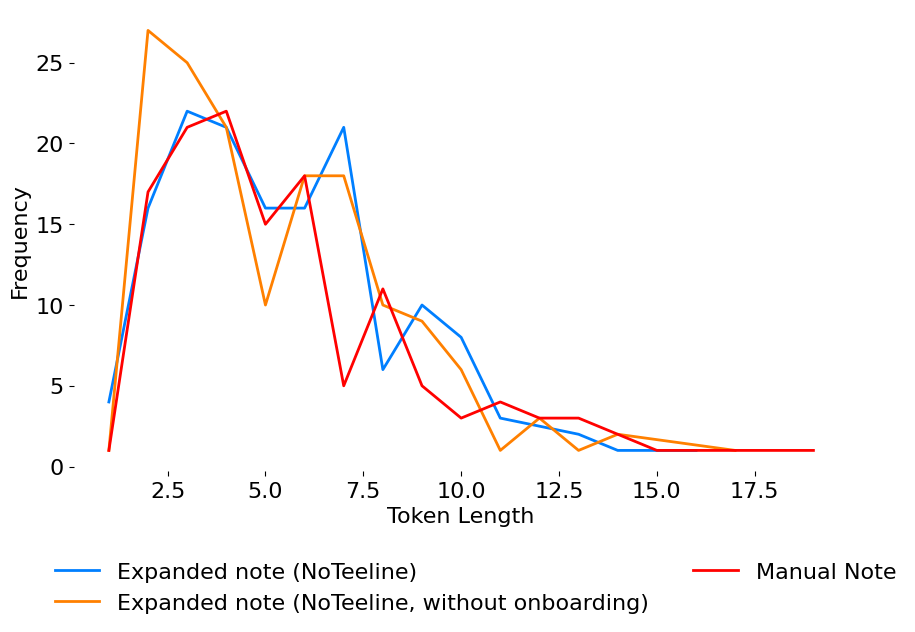

In [16]:
plt.rc('font', size=16)  # Set the font size to 24 or any desired size for better visibility
plt.rc('axes', titlesize=16)  # Set the font size for the axes title
plt.rc('axes', labelsize=16)  # Set the font size for the x and y labels
plt.rc('xtick', labelsize=16)  # Set the font size for the tick labels on the x-axis
plt.rc('ytick', labelsize=16)  # Set the font size for the tick labels on the y-axis
plt.rc('legend', fontsize=16)  # Set the font size for the legend
plt.rc('figure', titlesize=16)  # Set the font size for the figure title

import matplotlib.pyplot as plt
import nltk
nltk.download('punkt')

# Transform the authors' corpora into lists of word tokens
federalist_by_author_tokens = {}
federalist_by_author_length_distributions = {}
federalist_by_author_tokens_baseline = {}
federalist_by_author_length_distributions_baseline = {}
federalist_by_author_tokens_special = {}
federalist_by_author_length_distributions_special = {}

plt.figure(figsize=(10, 6))
tokens = nltk.word_tokenize(auto_note[author])
# filter out punctuation
tokens = ([token for token in tokens if any(c.isalpha() for c in token)])

federalist_by_author_tokens[author] = tokens
# Get a distribution of token lengths
token_lengths = [len(token) for token in federalist_by_author_tokens[author]]
federalist_by_author_length_distributions[author] = nltk.FreqDist(token_lengths)

token_lengths = [len(token) for token in tokens]
freq_dist = nltk.FreqDist(token_lengths)
lengths, frequencies = zip(*sorted(freq_dist.items()))
plt.plot(lengths, frequencies, label='Expanded note (NoTeeline)', color='#007fff', lw=2)

#----------------without onboarding----------------

tokens = nltk.word_tokenize(notee)
tokens = ([token for token in tokens if any(c.isalpha() for c in token)])
federalist_by_author_tokens_special[author] = tokens
token_lengths = [len(token) for token in federalist_by_author_tokens_special[author]]
federalist_by_author_length_distributions_special[author] = nltk.FreqDist(token_lengths)
token_lengths = [len(token) for token in tokens]
freq_dist = nltk.FreqDist(token_lengths)
lengths, frequencies = zip(*sorted(freq_dist.items()))
plt.plot(lengths, frequencies, label='Expanded note (NoTeeline, without onboarding)', color='#ff8000', lw=2)


# ------------Baseline--------------

tokens = nltk.word_tokenize(manual_note[author])
tokens = ([token for token in tokens if any(c.isalpha() for c in token)])

federalist_by_author_tokens_baseline[author] = tokens
# Get a distribution of token lengths
token_lengths = [len(token) for token in federalist_by_author_tokens_baseline[author]]
federalist_by_author_length_distributions_baseline[author] = nltk.FreqDist(token_lengths)

token_lengths = [len(token) for token in tokens]
freq_dist = nltk.FreqDist(token_lengths)
lengths, frequencies = zip(*sorted(freq_dist.items()))
plt.plot(lengths, frequencies, label='Manual Note', color='#ff0100', lw=2)
label_ = author + 1
# plt.title(f'Token Length Distribution by Author {label_}')
plt.xlabel('Token Length')
plt.ylabel('Frequency')
plt.box(False)
plt.legend(loc="lower left", bbox_to_anchor=(-0.05, -0.35), ncol=2, frameon=False)
plt.savefig('mcurve_p7.pdf', bbox_inches="tight")
plt.show()

In [17]:
federalist_by_author_tokens[author] = (
    [token.lower() for token in federalist_by_author_tokens[author]])

federalist_by_author_tokens_special[author] = (
    [token.lower() for token in federalist_by_author_tokens_special[author]])

federalist_by_author_tokens_baseline[author] = (
    [token.lower() for token in federalist_by_author_tokens_baseline[author]])

## Noteeline - Baseline

In [18]:
# Calculate chisquared for each of the two candidate authors

sum = 0

# First, build a joint corpus and identify the 500 most frequent words in it
joint_corpus = (federalist_by_author_tokens[author] +
                federalist_by_author_tokens_baseline[author])
joint_freq_dist = nltk.FreqDist(joint_corpus)
most_common = list(joint_freq_dist.most_common(500))

# What proportion of the joint corpus is made up
# of the candidate author's tokens?
author_share = (len(federalist_by_author_tokens[author])
                / len(joint_corpus))

# Now, let's look at the 500 most common words in the candidate
# author's corpus and compare the number of times they can be observed
# to what would be expected if the author's papers
# and the Disputed papers were both random samples from the same distribution.
chisquared = 0
for word,joint_count in most_common:

    # How often do we really see this common word?
    author_count = federalist_by_author_tokens[author].count(word)
    disputed_count = federalist_by_author_tokens_baseline[author].count(word)

    # How often should we see it?
    expected_author_count = joint_count * author_share
    expected_disputed_count = joint_count * (1-author_share)

    # Add the word's contribution to the chi-squared statistic
    chisquared += ((author_count-expected_author_count) *
                    (author_count-expected_author_count) /
                    expected_author_count)

    chisquared += ((disputed_count-expected_disputed_count) *
                    (disputed_count-expected_disputed_count)
                    / expected_disputed_count)

print("The Chi-squared statistic for candidate", author+1, "is", chisquared)
sum += chisquared

The Chi-squared statistic for candidate 11 is 224.37544063079798


## Noteeline(without onboarding) - Baseline

In [19]:
# Calculate chisquared for each of the two candidate authors

sum = 0

# First, build a joint corpus and identify the 500 most frequent words in it
joint_corpus = (federalist_by_author_tokens_special[author] +
                federalist_by_author_tokens_baseline[author])
joint_freq_dist = nltk.FreqDist(joint_corpus)
most_common = list(joint_freq_dist.most_common(500))

# What proportion of the joint corpus is made up
# of the candidate author's tokens?
author_share = (len(federalist_by_author_tokens_special[author])
                / len(joint_corpus))

# Now, let's look at the 500 most common words in the candidate
# author's corpus and compare the number of times they can be observed
# to what would be expected if the author's papers
# and the Disputed papers were both random samples from the same distribution.
chisquared = 0
for word,joint_count in most_common:

    # How often do we really see this common word?
    author_count = federalist_by_author_tokens_special[author].count(word)
    disputed_count = federalist_by_author_tokens_baseline[author].count(word)

    # How often should we see it?
    expected_author_count = joint_count * author_share
    expected_disputed_count = joint_count * (1-author_share)

    # Add the word's contribution to the chi-squared statistic
    chisquared += ((author_count-expected_author_count) *
                    (author_count-expected_author_count) /
                    expected_author_count)

    chisquared += ((disputed_count-expected_disputed_count) *
                    (disputed_count-expected_disputed_count)
                    / expected_disputed_count)

print("The Chi-squared statistic for candidate", author+1, "is", chisquared)
sum += chisquared

The Chi-squared statistic for candidate 11 is 215.02643734261332
